# Упражнение 00 : Линейный график

In [73]:
import pandas as pd
import sqlite3

## подключитесь к базе данных (она такая же, как и в предыдущий день)

In [74]:
con = sqlite3.connect('../data/checking-logs.sqlite')

## выполните запрос, который получает дату и время из таблицы просмотров страниц, выбирая только пользователей, а не администраторов

In [75]:
sql = '''
SELECT uid, datetime FROM pageviews
WHERE uid LIKE 'user_%'
'''
df = pd.read_sql(sql, con, parse_dates=['datetime'])
df

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


## с помощью Pandas создайте новый фрейм данных, в котором подсчитываются посещения и группируются по датам

In [76]:
date_count = df.groupby(df['datetime'].dt.date).agg({'uid': ['count']})
date_count = date_count.reset_index()
date_count

,datetime,uid
,,count
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2


## используя метод Pandas .plot(), создайте график
* размер шрифта должен быть 8
* размер рисунка равен (15,8)
* график должен содержать заголовок Просмотры за день
* обратите внимание на вращение xticks на графике ниже

<Axes: title={'center': 'Просмотры за день'}, xlabel='datetime'>

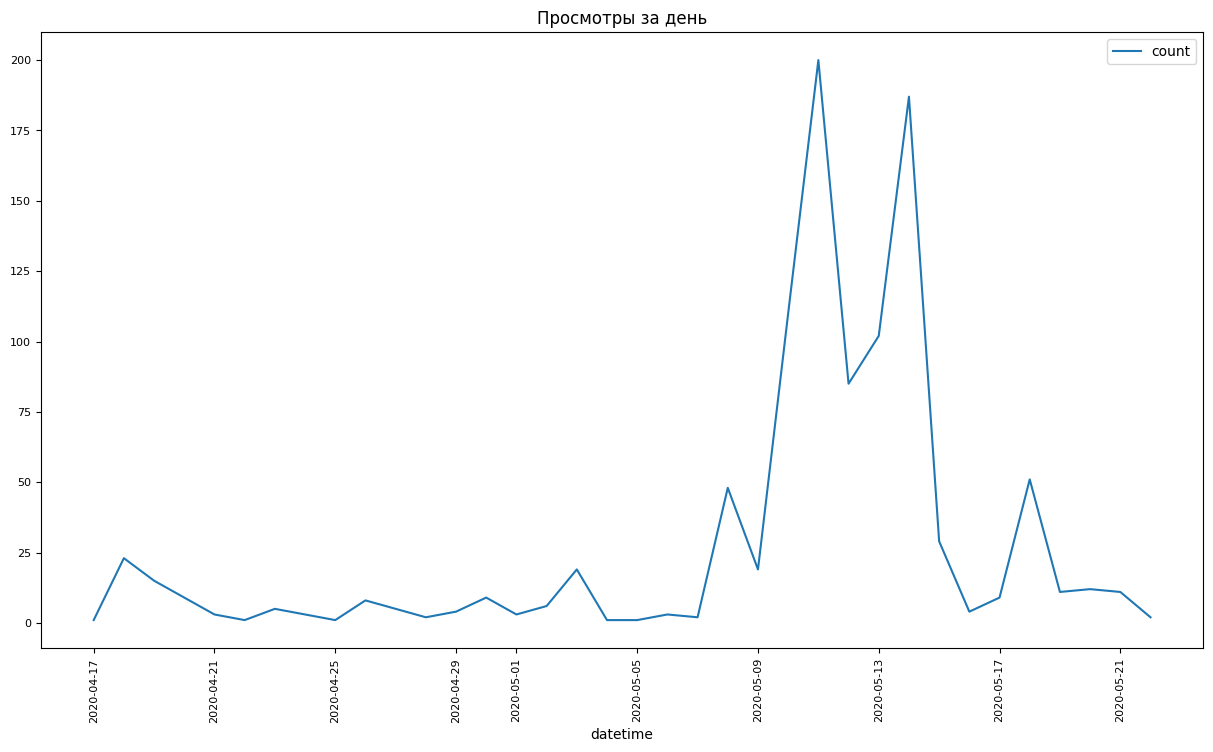

In [77]:
date_count.plot(x='datetime', y='uid', fontsize=8, figsize=(15, 8), title='Просмотры за день', rot=90)

## закройте подключение к базе данных

In [78]:
con.close()